<a href="https://colab.research.google.com/github/nicholashagemann/DS-Assignment-Submission-Practice-Repository/blob/master/LS_DS_Unit1_Sprint3_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Autograded Notebook (Canvas & CodeGrade)

This notebook will be automatically graded. It is designed to test your answers and award points for the correct answers. Following the instructions for each Task carefully.

### Instructions

* **Download this notebook** as you would any other ipynb file
* **Upload** to Google Colab or work locally (if you have that set-up)
* **Delete `raise NotImplementedError()`**
* Write your code in the `# YOUR CODE HERE` space
* **Execute** the Test cells that contain `assert` statements - these help you check your work (others contain hidden tests that will be checked when you submit through Canvas)
* **Save** your notebook when you are finished
* **Download** as a `ipynb` file (if working in Colab)
* **Upload** your complete notebook to Canvas (there will be additional instructions in Slack and/or Canvas)

# Lambda School Data Science - Unit 1 Sprint 3

## Sprint Challenge - Linear Algebra

### Total notebook points: 10


## Welcome to the final Sprint Challenge of Unit 1!

In this challenge, we're going to explore two different datasets where you can demonstrate your skills with fitting linear regression models and practicing some of the linear algebra concepts you learned.

**Make sure to follow the instructions in each task carefully!** The autograded tests are very specific in that they are designed to test on the exact instructions.

Good luck!


## Part A: Linear Regression

### Use the following information to complete Tasks 1 - 11

### Dataset description

The data you will work on for this Sprint Challenge is from the World Happiness Report. The report compiles data from a survey of hundreds of countries and looks at factors such as economic production, social support, life expectancy, freedom, absence of corruption, and generosity to determine a happiness "score". 

In this Sprint Challenge, we're only going to look at the report for years 2018 and 2019. We're going to see how much the happiness "score" depends on some of the factors listed above.

For more information about the data, you can look here: [Kaggle: World Happiness Report](https://www.kaggle.com/unsdsn/world-happiness)

### Task 1 - Load the data

* import both `pandas` and `numpy`
* use the URL provided to read in your DataFrame
* load the CSV file as a DataFrame with the name `happy` and **set the index column as** `Overall_rank`.
* the shape of your DataFrame should be `(312, 8)`

In [1]:
# Task 1
import pandas as pd
import numpy as np

# URL provided
url = "https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Happy/happiness_years18_19.csv"

#Load the data into a dataframe named happy
happy = pd.read_csv(url)
#Set the index to be the rank of the countries by happiness
happy = happy.set_index('Overall_rank')

# Print out the DataFrame
happy.head()

,Country_region,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_life_choices,Generosity,Perceptions_corruption
Overall_rank,,,,,,,,
1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,NaN
3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,NaN
4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


**Task 1 - Test**

In [2]:
# Task 1 - Test

assert isinstance(happy, pd.DataFrame), 'Have you created a DataFrame named `happy`?'
assert happy.index.name == 'Overall_rank', "Your index should be 'Overall_rank'."
assert len(happy) == 312


**Task 2** - Explore the data and find NaNs

Now you want to take a look at the dataset, determine the variable types of the columns, identify missing values, and generally better understand your data.

**Your tasks**

* Use describe() and info() to learn about any missing values, the data types, and descriptive statistics for each numeric value
* Sum the null values and assign that number to the variable `num_null`; the variable type should be a `numpy.int64` integer.

**Hint:** If you use `np.isnull()` it will return the number of null values in each column. You want the total number of null values in the entire DataFrame; one way to do this is to apply the `.sum()` method twice: `.sum().sum()`

In [3]:
# Task 2

#Let's see what we're working with here
happy.describe()
#happy.info() kept giving me some error in the autograder so I removed it
print(happy.isna().sum())
#I notice all the nulls are in a single column
num_null = happy.isna().sum().sum()

# Print out your integer result
print("The total number of null values is:", num_null)

Country_region               0
Score                        0
GDP_per_capita               0
Social_support               0
Healthy_life_expectancy      0
Freedom_life_choices         0
Generosity                   0
Perceptions_corruption     226
dtype: int64
The total number of null values is: 226


**Task 2 Test**

In [4]:
# Task 2 - Test
import numpy as np
assert isinstance(num_null, np.int64), 'The sum of the NaN values should be an integer.'


**Task 3** - Drop a column

As you noticed in the previous task, the column `Perceptions_corruption` has a lot of missing values. Let's determine how many are missing and then drop the column. Note: dropping a column isn't always the best choice when faced with missing values but we're choosing that option here, partly for practice.

* Calculate the percentage of NaN values in `Perceptions_corruption` and assign the result to the variable `corruption_nan`; the value should be a **float** between `1.0` and `100.0`.
* Drop the `Perceptions_corruption` column from `happy` but keep the DataFrame name the same; use the parameter `inplace=True`. You will also want to specify the axis on which to operate.

In [5]:
# Task 3

#Percent of NaN values = total NaN values / total values
#Calculating the percent of NaN values in the Perceptions_corruption column
corruption_nan = happy['Perceptions_corruption'].isna().sum() / len(happy['Perceptions_corruption']) * 100

# Print the percentage of NaN values
print(corruption_nan)

#Drop the Perceptions_corruption column since it has so many NaN values
happy.drop('Perceptions_corruption', axis = 1, inplace = True)

# Print happy to verify the column was dropped
happy.head()

72.43589743589743


,Country_region,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_life_choices,Generosity
Overall_rank,,,,,,,
1,Finland,7.632,1.305,1.592,0.874,0.681,0.202
2,Norway,7.594,1.456,1.582,0.861,0.686,0.286
3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284
4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353
5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256


***Task 3 Test**

In [6]:
# Task 3 - Test

assert isinstance(corruption_nan, np.float), 'The percentage of NaN values should be a float.'
assert corruption_nan >= 1, 'Make sure you calculated the percentage and not the decimal fraction.'


**Task 4** - Visualize the dataset

Next, we'll create a visualization for this dataset. We know from the introduction that we're trying to predict the happiness score from the other factors. Before we do let, let's visualize the dataset using a seaborn `pairplot` to look at all of the columns plotted as "pairs".

**Your tasks**

* Use the seaborn library `sns.pairplot()` function to create your visualization (use the starter code provided)

This task will not be autograded - but it is part of completing the challenge.

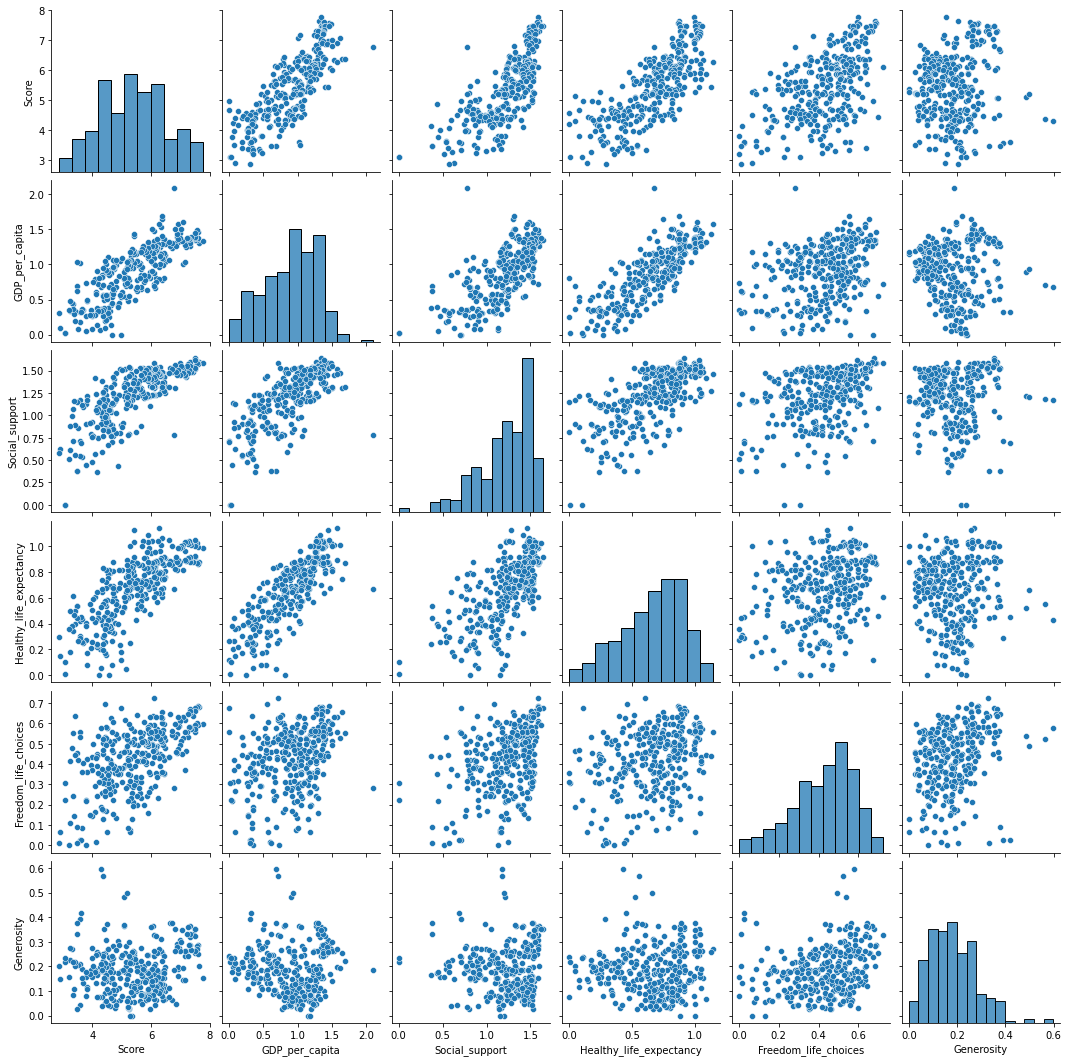

In [7]:
# Task 4
# (NOT autograded but fill in your code!)

# Import seaborn
import seaborn as sns
import matplotlib.pyplot as plt


# Use sns.pairplot(data) where data is the name of your DataFrame
sns.pairplot(data = happy)

# YOUR CODE HERE
#Our dependent variable is obviously Score, which represents the Happiness in each country. From merely observing the data,
  #we expect that GDP, life expectancy, social support, and freedom will correlate with happiness score.
#Generosity looks like it might also have a correlation, but it's bound to be weaker, and it looks like there are a few outliers
  #which might throw off the linear model.

**Task 5** - Identify the dependent and independent variables

Before we fit a linear regression to the variables in this data set, we need to determine the dependent variable (the target or y variable) and independent variable (the feature or x variable). For this dataset, we have one dependent variable and a few choices for the independent variable(s). Using the information about the data set and what you know from previous tasks, complete the following:

* Assign the dependent variable to `y_var`
* Choose **one** independent variable and assign it to `x_var`

In [8]:
# Task 5

# YOUR CODE HERE
#Our dependent variable is obviously Happiness Score, and a strong independent variable looks to be GDP per capita
y_var = happy['Score']
x_var = happy['GDP_per_capita']

**Task 5 Test**

In [9]:
# Task 5 - Test

# Hidden tests - you will see the results when you submit to Canvas

**Task 6** - Fit a line using seaborn

Before we fit the linear regression model, we'll check how well a line fits. Because you have some choices for which independent variable to select, we're going to complete the rest of our analysis using `GDP per capita` as the independent variable. We're using `Score` as the dependent (target) variable.

The seaborn `lmplot()` documentation can be found [here](https://seaborn.pydata.org/generated/seaborn.lmplot.html). You can also use `regplot()` and the documentation is [here](https://seaborn.pydata.org/generated/seaborn.regplot.html)

This task will not be autograded - but it is part of completing the challenge!

**Your tasks:**

* Create a scatter plot using seaborn with `GDP_per_capita` and `Score`
* Use `sns.lmplot()` or `sns.regplot()` and specify a confidence interval of 0.95
* Answer the questions about your plot (not autograded).


Text(0.5, 1.0, 'How GDP per capita correlates with happiness for different countries')

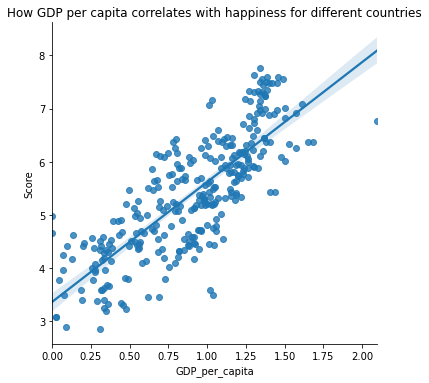

In [10]:
# Task 6

# YOUR CODE HERE
#Let's plot GDP per capita and Score, and fit a linear regression with a 95% confidence interval 
sns.lmplot(x = 'GDP_per_capita', y = 'Score', data = happy, ci = 95)
#Looks like we have a strong linear correlation
plt.title('How GDP per capita correlates with happiness for different countries')

**Task 6** - Short answer

1. Does it make sense to fit a linear model to these two variables? In otherwords, are there any problems with this data like extreme outliers, non-linearity, etc.
2. Over what range of your independent variable does the linear model not fit the data well? Over what range does a line fit the data well?

---

1. A linear model is clearly appropriate here, the data clearly show a linear trend from merely observing the graph generated, and the 95% confidence interval is very narrow for the linear model that lmplot fits. There are a handful of outliers, but that is expected from any data set - these outliers do not negate the linearity of the correlation or suggest that a log would be a more effective model. 
2. The data fits well for 0 < GDP < 1.75, as that data shows a strong correlation with many data points. Obviously GDP cannot be 0 or negative, so it will not fit for values < 0. We also only have a single outlier for GDP > 1.75, so we cannot assume that data will also fit the linear trend.

**Task 7** - Fit a linear regression model

Now it's time to fit the linear regression model! We have two variables (`GDP_per_capita` and `Score`) that we are going to use in our model.

**Your tasks:**

*  Use the provided import for the `statsmodels.formula.api` library `ols` method
*  Fit a **single variable linear regression model** and assign the model to the variable `model_1`
* Print out the model summary and assign the value of R-squared for this model to `r_square_model_1`. Your value should be defined to three decimal places (example: `r_square_model_1 = 0.123`)
* Answer the questions about your resulting model parameters (these short answer questions will not be autograded).

**NOTE:** - For this task to be correctly autograded, you need to input the model parameters as specified in the code cell below. Part of this Sprint Challenge is correctly implementing the instructions in each task.

In [11]:
# Task 7

# Import the OLS model from statsmodels
from statsmodels.formula.api import ols

#We will use our ols function to do a linear regression and fit it to a new variable called model
model_1 = ols('Score ~ GDP_per_capita', data = happy).fit()
r_square_model_1 = 0.637

# Print the model summary
print(model_1.summary())
#This will tell us everything we need to know about our linear regression. Not only does it give us our intercept and slope,
  #but it also tells us the p-value and t-statistic for each (with null hypothesis being that each = 0), as well as our 95% confidence interval.

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     543.4
Date:                Sat, 19 Jun 2021   Prob (F-statistic):           3.82e-70
Time:                        01:20:54   Log-Likelihood:                -318.08
No. Observations:                 312   AIC:                             640.2
Df Residuals:                     310   BIC:                             647.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.3667      0.095     35.

**Task 7 Test**

In [12]:
# Task 7 - Test

# Hidden tests - you will see the results when you submit to Canvas

**Task 8** - Interpret your model

Using the model summary you printed out above, answer the following questions.

* Assign the slope of `GDP_per_capita` to the variable `slope_model_1`; define it to two decimal places (example: 1.23). This variable should be a float.
* Assign the p-value for this model parameter to `pval_model_1`; this variable could be either an integer or a float.
* Assign the 95% confidence interval to the variables `ci_low` (lower value) and `ci_upper` (upper value); define them to two decimal places.

Answer the following questions (not autograded):

1. Is the correlation between your variables positive or negative?
2. How would you write the confidence interval for your slope coefficient?
3. State the null hypothesis to test for a statistically significant relationship between your two variables.
4. Using the p-value from your model, do you **reject** or **fail to reject** the null hypothesis?

---

1. The correlation between Happiness Score and GDP per capita is positive, as the slope of our linear model is positive. This means that as GDP per capita increases, Happiness Score also increases, which is something we can see by merely plotting the data, as well as something that makes sense intuitively.
2. We are 95% confident that the true value of the slope for our univariate linear model relating GDP per capita to Happiness score is between 2.064 and 2.444. So we will be wrong about this 5% of the time, or 1 in 20 models.
3. Assuming our linear model is $y = \beta_0 + \beta_1x_1$, our null hypothesis is $H_0: \beta_1 = 0$. Thus, our alternative hypothesis is $H_a: \beta_1 \neq 0.$
4. Our p-value is 0.00, which means we are more than 99% confident that $\beta_1 \neq 0$, so we reject our null hypothesis. Mathematically, $p < \alpha \Rightarrow H_0 = False \Rightarrow \beta_1 \neq 0.$

In [13]:
# Task 8

# YOUR CODE HERE
#Here, I simply look at my model summary and copy down the values it spits out. Kind of boring, but it works I guess. 
#Here I want the slope for GDP, its p-value, and 95% confidence interval.
slope_model_1 = 2.25
pval_model_1 = 0.00
ci_low = 2.06
ci_upper = 2.44
#This is our 95% confidence interval for the slope. If we wanted a narrower confidence interval, we have to sacrifice some confidence
#i.e. a 90% confidence interval is narrower than a 95% interval, but less confident
#likewise, if we want more confidence, we have to accept a wider interval
#i.e. a 99% confidence interval is more confident than a 95% interval, but wider

**Task 8 Test**

In [14]:
# Task 8 - Test

# Hidden tests - you will see the results when you submit to Canvas

**Task 9** - Fit a multiple predictor linear regression model

For this next task, we'll add in an additional independent or predictor variable. Let's look back at the pairplot and choose another variable - we'll use `Social_support`. Recall from the Guided Projects and Module Projects that we are looking to see if adding the variable `Social_support` is statistically significant after accounting for the `GDP_per_capita` variable.

We're going to fit a linear regression model using two predictor variables: `GDP_per_capita` and `Social_support`.

**Your tasks:**

* Fit a model with both predictor variables and assign the model to `model_2`. The format of the input to the model is `Y ~ X1 + X2`. 
    * **X1 = `GDP_per_capita`** and  **X2 = `Social_support`**.
* Print out the model summary and assign the value of R-squared for this model to `r_square_model_2`. Your value should be defined to three decimal places.
* Assign the value of the adjusted R-square to `adj_r_square_model_2`. Your value should be defined to three decimal places.

In [15]:
# Task 9

#Now we're cooking - we're using a bivariate linear model to see how well GDP and social support predict Happiness.
#Our ols function will do all the work for us, as before...
model_2 = ols('Score ~ GDP_per_capita + Social_support', data = happy).fit()

# Print the model summary
print(model_2.summary())
#Our summary tells us everything we want to know, and I copy down the r-squared and adjusted r-squared values. 
r_square_model_2 = 0.712
adj_r_square_model_2 = 0.710
#Social support is also strongly correlated with happiness score, as its p-value is 0.00, which is less than 0.05.
#Adding in the social support does not affect the p-value for GDP, so we can conclude there is not overlap
  #in the variance for happiness score that each accounts for. 
#We notice the slope for GDP and social support is similar, which means that for each unit of increase in GDP or social support,
  #there is roughly the same increase in happiness score. To interpret this further, we must look at the how the units were determined in the study. 

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     381.5
Date:                Sat, 19 Jun 2021   Prob (F-statistic):           3.46e-84
Time:                        01:20:54   Log-Likelihood:                -282.03
No. Observations:                 312   AIC:                             570.1
Df Residuals:                     309   BIC:                             581.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.3178      0.144     16.

**Task 9 Test**

In [16]:
# Task 9 - Test

# Hidden tests - you will see the results when you submit to Canvas

**Task 10** - Multiple regression model interpretation

Now that we have added an additional variable to our regression model, let's look at how the explained variance (the R-squared value) changes.

**Your tasks**
* Find the explained variance from `model_1` and assign it to the variable `r_square_percent1`; your variable should be expressed as a **percentage** and should be rounded to the nearest integer.
* Find the explained variance (*adjusted!*) from `model_2` and assign it to the variable `r_square_adj_percent2`; you variable should be expressed as a **percentage** and should be rounded to the nearest integer.

---
Question (not autograded):

How does the adjusted R-squared value change when a second predictor variable is added?

YOUR ANSWER

In [17]:
# Task 10

# YOUR CODE HERE
#I convert my r-squared values into percents and round to the integer
r_square_percent1 = round(r_square_model_1*100, 0)
r_square_adj_percent2 = round(r_square_model_2*100, 0)
print(f'The adjusted R-squared percentage for model 1 is {r_square_percent1} and model 2 is {r_square_adj_percent2}')

The adjusted R-squared percentage for model 1 is 64.0 and model 2 is 71.0


**Task 10 Test**

In [18]:
# Task 10 - Test
assert r_square_percent1 >= 1, 'Make sure you use the percentage and not the decimal fraction.'
assert r_square_adj_percent2 >= 1, 'Make sure you use the percentage and not the decimal fraction.'

# Hidden tests - you will see the results when you submit to Canvas

**Task 11** - Making a prediction and calculating the residual

We're going to use our model to make a prediction. Refer to the `happy` DataFrame and find the `GDP_per_capita` score for "Iceland" (index 4).  Then when we have a prediction, we can calculate the residual.  **There are actually two row entries for Iceland, both with slightly different column values. Use the column values that you can see when you print `happy.head()`.**

**Prediction**
* Assign the `GDP_per_capita` value to the variable `x_iceland`; it should be float and defined out to two decimal places.
* Using your slope and intercept values from `model_1`, calculate the `Score` for Iceland (`x_iceland`); assign this value to `predict_iceland` and it should be a float.

**Residual**
* Assign the observed `Score` for Iceland and assign it to the variable `observe_iceland`; it should be float and defined out to two decimal places *(careful with the rounding!)*.
* Determine the residual for the prediction you made and assign it to the variable `residual_iceland` (use your Guided Project or Module Project notebooks if you need a reminder of how to do a residual calculation).

Hint: Define your slope and intercept values out to two decimal places! Your resulting prediction for Iceland should have at least two decimal places. **Make sure to use the parameters from the first model (`model_1`)**.

In [19]:
happy.head()

,Country_region,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_life_choices,Generosity
Overall_rank,,,,,,,
1,Finland,7.632,1.305,1.592,0.874,0.681,0.202
2,Norway,7.594,1.456,1.582,0.861,0.686,0.286
3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284
4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353
5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256


In [20]:
# Task 11
#I grab my intercept and slope from model 1, using GDP as my only independent variable
int_gdp, slope_gdp = model_1.params

#I look at my dataframe and grab the actual Score of Iceland
observe_iceland = round(7.495, 2)
#I look at my dataframe and grab Iceland's GDP value
x_iceland = 1.343
#Using my model...
predict_iceland = int_gdp + slope_gdp * x_iceland
#Finding my residual...
residual_iceland = observe_iceland - predict_iceland

# View your prediction
print('Prediction for Iceland :', predict_iceland)
print('Residual for Iceland prediction :', residual_iceland)

Prediction for Iceland : 6.393908708081247
Residual for Iceland prediction : 1.1060912919187533


**Task 11 Test**

In [21]:
# Task 11 - Test

assert residual_iceland >= 0, 'Check your residual calculation (use observed - predicted).'
assert round(x_iceland, 1) == 1.3, 'Check your Iceland GDP value.'
assert round(observe_iceland, 1) == 7.5, 'Check your Iceland observation value for "Score".'

# Hidden tests - you will see the results when you submit to Canvas

Below is some extra stuff I did. First I did a regplot for each independent variable and Score with confidence intervals to see how strong the correlation was and how confident we could be about the slope. 

Then I wrote my own function for using linear algebra to get the beta coefficients for our linear regression function given our matrix of independent variables $X$ and our matrix of dependent observations $Y$. I test this against models 1 and 2 to ensure it works. Then I make two new models, model 3 and model 4. Model 3 uses GDP, social support, and life expectancy. Model 4 uses GDP, social support, life expectancy, and freedom. I check to make sure my function gives me the same slopes and intercepts. 

I got curious as to what single independent variable was the best predictor of happiness score, and found that it was GDP. Our adjusted $R^2$ values for GDP, social support, life expectancy, freedom, and generosity were 0.636, 0.578, 0.570, 0.289, and 0.008 respectively. Each had a p-value of 0.00 except generosity, which had a p-value of 0.06. Since generosity has a p-value > 0.05 and very low correlation I decide against making a model using it. 

I then check what two-variable model is the best predictor. I only picked my inputs from GDP, social support, and life expectancy but in hindsight I think I should have included freedom, for reasons explained below. My adjusted $R^2$ values were 0.710 for the GDP+social support model, 0.667 for the GDP+life model, and 0.688 for the social+life model. Interesting that social+life has better predictive power than GDP+social given that GDP and social individually have more predictive power. Could be noise - difficult to distinguish the signal with values so close. 

I then decided to compare my different models. Model 1 and model 2 are part of the assignment, and model 3 and model 4 I made on my own, as stated above. Each increases in predictive power - the $R^2$ value for model 1 is 0.636, model 2 is 0.710, model 3 is 0.725, and model 4 is 0.773. Interesting that adding freedom to model 3 resulted in a greater increase of predictive power than adding life expectancy to model 2. P-values for all slopes in all models remained at 0.00, so they are not accounting for the same variance. 

Finally, I decided to make two new matrices to represent the residuals for each model and the percent error. These two matrices, termed residuals and pct_error, have the residual/percent error for each model applied to each country. In the cells, I calculate the mean residual (in absolute value) and the mean percent error for each model. For model 1, the mean residual is 0.545 and the mean percent error is 0.107. For model 2, the mean residual is 0.482 and the mean percent error is 0.095. For model 3, the mean residual is 0.476 and the mean percent error is 0.094. For model 4, the mean residual is 0.418 and the mean percent error is 0.083. 


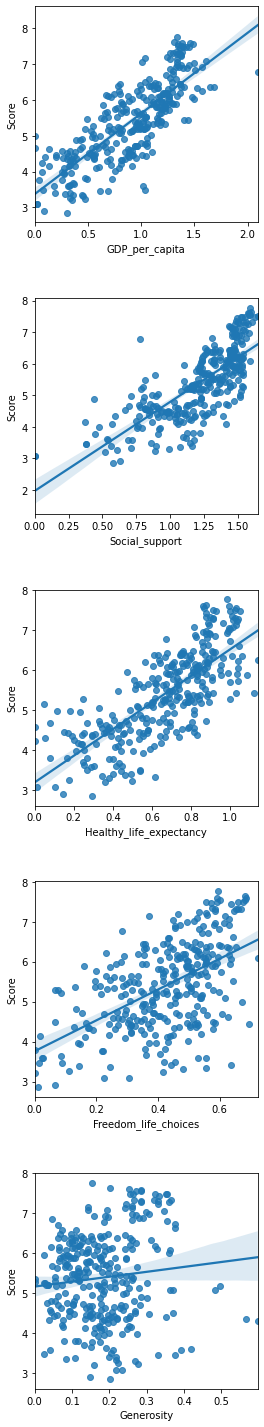

In [49]:
#let's play around with our data a bit, and see which independent variables have the greatest predictive power. 
fig,(ax0, ax1, ax2, ax3, ax4) = plt.subplots(5, figsize = (4,8))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=2.5, wspace=0.2, hspace=0.35)


sns.regplot(x = happy['GDP_per_capita'], y = happy['Score'], ax = ax0)
sns.regplot(x = happy['Social_support'], y = happy['Score'], ax = ax1)
sns.regplot(x = happy['Healthy_life_expectancy'], y = happy['Score'], ax = ax2)
sns.regplot(x = happy['Freedom_life_choices'], y = happy['Score'], ax = ax3)
sns.regplot(x = happy['Generosity'], y = happy['Score'], ax = ax4)

For a linear model $$Y = XB + \epsilon$$ where $Y$ represents the dependent variable, $X$ represents the independent variables, $B$ represents the coefficients, and $\epsilon$ represents the residuals, the solution is $$ B = (X^{'}X)^{-1}X^{'}Y$$

In [23]:
#I want to verify the model with my own calculations.
#First, I write a function which will get my coefficients with an input of our independent variable(s) and our dependent variable
#The inputs here are matrices, so I will be able to calculate the coefficients from the raw data, after I have put it into a numpy matrix
def get_beta(x, y):
  return np.linalg.inv(x.transpose() @ x) @ (x.transpose() @ y)
#In order to do the calculation correctly, I need a column of ones in my X matrix, so I will add a column of ones to my happy dataframe.
happy['ones'] = 1

In [24]:
#Fist, I verify model 1.
#My dependent variable is happiness score, of course. Converting it to a numpy matrix...
Y = happy[['Score']].to_numpy()
#independent variable for model 1 is just GDP. Making my independent matrix...
X1 = happy[['ones', 'GDP_per_capita']].to_numpy()

#Use my function to get my coefficients and print them out
B1 = get_beta(X1,Y)
print(f'Betas = \n{B1}')
print(f"Using numpy, our intercept is {B1[0,0]} and our slope for GDP is {B1[1,0]}.")
print("I make an assertion that it's the same as model 1.")

assert round(B1[0,0],4) == round(model_1.params[0],4)
assert round(B1[1,0],4) == round(model_1.params[1],4)

Betas = 
[[3.36665334]
 [2.25409931]]
Using numpy, our intercept is 3.366653335169605 and our slope for GDP is 2.254099309688489.
I make an assertion that it's the same as model 1.


In [25]:
#Verifying model 2 here
#same dependent variable
Y = happy[['Score']].to_numpy()
#independent variables are now GDP and social support
X2 = happy[['ones', 'GDP_per_capita', 'Social_support']].to_numpy()

#Use my function to get my coefficients and print them out
B2 = get_beta(X2,Y)
print(f'Betas = \n{B2}')
print(f"Using numpy, our intercept is {B2[0,0]} and our slopes for GDP and Social Support are {B2[1,0]}, {B2[2,0]}.")
print("I make an assertion that it's the same as model 2.")

assert round(B2[0,0],4) == round(model_2.params[0],4)
assert round(B2[1,0],4) == round(model_2.params[1],4)
assert round(B2[2,0],4) == round(model_2.params[2],4)

Betas = 
[[2.31782612]
 [1.46699921]
 [1.44990961]]
Using numpy, our intercept is 2.317826123391142 and our slopes for GDP and Social Support are 1.4669992068734548, 1.4499096146271926.
I make an assertion that it's the same as model 2.


In [58]:
#I decide to make a new model using GDP, social support, and life expectancy
model_3 = ols('Score ~ GDP_per_capita + Social_support + Healthy_life_expectancy', data = happy).fit()

#print(model_3.summary())
#P-values look good, everything is 0.00. Adjusted R-squared is higher than model 2.

In [59]:
#I test that model 3 works the same as my function
#Dependent variable is the same
Y = happy[['Score']].to_numpy()

#Independent variables are now GDP, social support, and life expectancy
X3 = happy[['ones', 'GDP_per_capita', 'Social_support', 'Healthy_life_expectancy']].to_numpy()

#get coefficients
B3 = get_beta(X3,Y)
print(f'Betas are = \n{B3}')
print(f'Our intercept is {B3[0,0]}, and our slopes for GDP, social support, and life expectancy are {B3[1,0]}, {B3[2,0]}, {B3[3,0]}.')
print('I make an assertion these are the same as our model 3.')

#check to make sure it fits the model
assert round(B3[0,0],4) == round(model_3.params[0],4)
assert round(B3[1,0],4) == round(model_3.params[1],4)
assert round(B3[2,0],4) == round(model_3.params[2],4)
assert round(B3[3,0],4) == round(model_3.params[3],4)

Betas are = 
[[2.2342381 ]
 [1.03227345]
 [1.30584963]
 [0.98074506]]
Our intercept is 2.234238095588246, and our slopes for GDP, social support, and life expectancy are 1.032273453849612, 1.3058496259145755, 0.9807450557565716.
I make an assertion these are the same as our model 3.


In [26]:
#I decide to make a new model using GDP, social support, life expectancy, and freedom as independent variables.
model_4 = ols('Score ~ GDP_per_capita + Social_support + Healthy_life_expectancy + Freedom_life_choices', data = happy).fit()
#print(model_4.summary())
#I see that each variable has a p-value of 0, so it tells me each is valid. 
#Adjusted R-squared is pretty high...

In [29]:
#Now I test that model 4 works the same as my function
#Dependent variable is the same
Y = happy[['Score']].to_numpy()

#Independent variables are now GDP, social support, life expectancy, and freedom
X4 = happy[['ones', 'GDP_per_capita', 'Social_support', 'Healthy_life_expectancy', 'Freedom_life_choices']].to_numpy()

#Get my new coefficients
B4 = get_beta(X4,Y)
print(f'Betas are = \n{B4}')
print(f'Our intercept is {B4[0,0]}, and our slopes for GDP, social support, life expectancy, and freedom are {B4[1,0]}, {B4[2,0]}, {B4[3,0]}, {B4[4,0]}.')
print('I make an assertion these are the same as our model 4.')

assert round(B4[0,0],4) == round(model_4.params[0],4)
assert round(B4[1,0],4) == round(model_4.params[1],4)
assert round(B4[2,0],4) == round(model_4.params[2],4)
assert round(B4[3,0],4) == round(model_4.params[3],4)
assert round(B4[4,0],4) == round(model_4.params[4],4)

Betas are = 
[[1.94014934]
 [0.95790583]
 [0.9779504 ]
 [1.01185802]
 [1.74107583]]
Our intercept is 1.9401493393962022, and our slopes for GDP, social support, life expectancy, and freedom are 0.957905829390631, 0.977950400403906, 1.011858017316517, 1.7410758290763628.
I make an assertion these are the same as our model 4.


In [30]:
model_GDP = ols('Score ~ GDP_per_capita', data = happy).fit()
model_social = ols('Score ~ Social_support', data = happy).fit()
model_life = ols('Score ~ Healthy_life_expectancy', data = happy).fit()
model_freedom = ols('Score ~ Freedom_life_choices', data = happy).fit()
model_generosity = ols('Score ~ Generosity', data = happy).fit()

#print(model_generosity.summary())
#Here I printed out the model summary for each model and copied down their adjusted R2 values

adj_r2_gdp = 0.636
adj_r2_social = 0.578
adj_r2_life = 0.570
adj_r2_freedom = 0.289
adj_r2_generosity = 0.008
#I checked the p-values for each model, and every one but generosity was less than 0.05. Generosity had a p-value of 0.06.
#I decide that Generosity has too high a p-value and accounts for too little variance to be useful in a model.

In [31]:
#I want to see what is the most effective model for two independent variables.
#Looking at my previous cell, I can conclude freedom will not be very effective, so I look at pairs of GDP, social support, and life expectancy
model_GDP_social = ols('Score ~ GDP_per_capita + Social_support', data = happy).fit()
model_GDP_life = ols('Score ~ GDP_per_capita + Healthy_life_expectancy', data = happy).fit()
model_social_life = ols('Score ~ Social_support + Healthy_life_expectancy', data = happy).fit()

#print(model_social_life.summary())

adj_r2_gdp_social = 0.710
adj_r2_gdp_life = 0.667
adj_r2_social_life = 0.688

#The most effective model is GDP and social support, which is our model 2

In [32]:
#Here I print out the summary for each model and compare their adjusted r-squared values

#print(model_4.summary())

adj_r2_model1 = 0.636
adj_r2_model2 = 0.710
adj_r2_model3 = 0.725
adj_r2_model4 = 0.773
#Interestingly, there is a larger jump in accuracy from model 3 to model 4 than from model 2 to model 3. 
#Freedom accounted for the lowest amount of variance, but adding it to GDP+social+life gave a larger boost than adding life to GDP+social

In [33]:
#Here I calculate the average residual for each model
#My new dataframe residuals gives the residual for each model applied to each country

#Making my new dataframe
residuals = pd.DataFrame(index = happy.index, data = happy[['Country_region','Score']])

#Making my columns the residual for each model applied to each country
residuals['Model_1_Residual'] = happy['Score'] - (model_1.params[0] + model_1.params[1]*happy['GDP_per_capita'])
residuals['Model_2_Residual'] = happy['Score'] - (model_2.params[0] + model_2.params[1]*happy['GDP_per_capita'] + model_2.params[2]*happy['Social_support'])
residuals['Model_3_Residual'] = happy['Score'] - (model_3.params[0] + model_3.params[1]*happy['GDP_per_capita'] + model_3.params[2]*happy['Social_support'] + model_3.params[3]*happy['Healthy_life_expectancy'])
residuals['Model_4_Residual'] = happy['Score'] - (model_4.params[0] + model_4.params[1]*happy['GDP_per_capita'] + model_4.params[2]*happy['Social_support'] + model_4.params[3]*happy['Healthy_life_expectancy'] + model_4.params[4]*happy['Freedom_life_choices'])

#Printing out my average residual for each model
print('All Mean Residuals given as absolute values, i.e. no distinction between positive and negative residuals.')
print('Mean Residual for Model 1 = ', abs(residuals['Model_1_Residual']).sum() / len(residuals['Model_1_Residual']))
print('Mean Residual for Model 2 = ', abs(residuals['Model_2_Residual']).sum() / len(residuals['Model_2_Residual']))
print('Mean Residual for Model 3 = ', abs(residuals['Model_3_Residual']).sum() / len(residuals['Model_3_Residual']))
print('Mean Residual for Model 4 = ', abs(residuals['Model_4_Residual']).sum() / len(residuals['Model_4_Residual']))

#ah, the sweet smell of residuals
residuals.head()

All Mean Residuals given as absolute values, i.e. no distinction between positive and negative residuals.
Mean Residual for Model 1 =  0.5453982852946976
Mean Residual for Model 2 =  0.4822160897294809
Mean Residual for Model 3 =  0.47620681367421924
Mean Residual for Model 4 =  0.41848590766259736


,Country_region,Score,Model_1_Residual,Model_2_Residual,Model_3_Residual,Model_4_Residual
Overall_rank,,,,,,
1,Finland,7.632,1.323747,1.091484,1.114561,0.814850
2,Norway,7.594,0.945378,0.846466,0.946496,0.646434
3,Denmark,7.555,1.143058,0.949902,0.998573,0.698331
4,Iceland,7.495,1.101091,0.823343,0.831201,0.557086
5,Switzerland,7.487,0.919526,0.840125,0.855022,0.584677


In [34]:
#Here I calculate the percent error for each model.
#My new dataframe pct_error gives the percent error for each model applied to each country.
#I also print out the average percent error for each model. 

#Making my new dataframe
pct_error = pd.DataFrame(index = happy.index, data = happy[['Country_region','Score']])

#Creating the percent error columns for each model
pct_error['Model_1_Pct_Error'] = abs(residuals['Model_1_Residual']) / residuals['Score']
pct_error['Model_2_Pct_Error'] = abs(residuals['Model_2_Residual']) / residuals['Score']
pct_error['Model_3_Pct_Error'] = abs(residuals['Model_3_Residual']) / residuals['Score']
pct_error['Model_4_Pct_Error'] = abs(residuals['Model_4_Residual']) / residuals['Score']

#Printing out the average percent error for each model
print('Average Percent Error for Model 1 = ', pct_error['Model_1_Pct_Error'].sum() / len(pct_error['Model_1_Pct_Error']))
print('Average Percent Error for Model 2 = ', pct_error['Model_2_Pct_Error'].sum() / len(pct_error['Model_2_Pct_Error']))
print('Average Percent Error for Model 3 = ', pct_error['Model_3_Pct_Error'].sum() / len(pct_error['Model_3_Pct_Error']))
print('Average Percent Error for Model 4 = ', pct_error['Model_4_Pct_Error'].sum() / len(pct_error['Model_4_Pct_Error']))

#ooh, fancy, let's take a look
pct_error.head()

Average Percent Error for Model 1 =  0.10710649232408888
Average Percent Error for Model 2 =  0.09513408941322553
Average Percent Error for Model 3 =  0.09402915754627063
Average Percent Error for Model 4 =  0.08334252392075904


,Country_region,Score,Model_1_Pct_Error,Model_2_Pct_Error,Model_3_Pct_Error,Model_4_Pct_Error
Overall_rank,,,,,,
1,Finland,7.632,0.173447,0.143014,0.146038,0.106768
2,Norway,7.594,0.124490,0.111465,0.124637,0.085124
3,Denmark,7.555,0.151298,0.125732,0.132174,0.092433
4,Iceland,7.495,0.146910,0.109852,0.110901,0.074328
5,Switzerland,7.487,0.122816,0.112211,0.114201,0.078092


## Part B: Vectors and cosine similarity

In this part of the challenge, we're going to look at how similar two vectors are. Remember, we can calculate the **cosine similarity** between two vectors by using this equation:

$$\cos \theta= \frac{\mathbf {A} \cdot \mathbf {B} }{\left\|\mathbf {A} \right\|\left\|\mathbf {B} \right\|}$$

$\qquad$

where

* The numerator is the dot product of the vectors $\mathbf {A}$ and $\mathbf {B}$
* The denominator is the norm of $\mathbf {A}$ times the norm of $\mathbf {B}$

### Three documents, two authors

For this task, you will calculate the cosine similarity between three vectors. But here's the interesting part: each vector represents a "chunk" of text from a novel (a few chapters of text). This text was cleaned to remove non-alphanumeric characters and numbers and then each document was transformed into a vector representation as described below.

### Document vectors

In the dataset you are going to load below, each row represents a word that occurs in at least one of the documents. So all the rows are all the words that are in our three documents.

Each column represents a document (doc0, doc1, doc2). Now the fun part: the value in each cell is how frequently that word (row) occurs in that document (term-frequency) divided by how many documents that words appears in (document-frequency).

`cell value = term_frequency / document_frequency`

Use the above information to complete the remaining tasks.

**Task 12** - Explore the text documents

You will be using cosine similarity to compare each document vector to the others. Remember that there are three documents, but two authors. Your task is to use the cosine similarity calculations to determine which two document vectors are most similar (written by the same author).

**Your tasks:**

* Load in the CSV file that contains the document vectors (this is coded for you - just run the cell)
* Look at the DataFrame you just loaded in any way that helps you understand the format, what's included in the data, the shape of the DataFrame, etc.

**You can use document vectors just as they are - you don't need to code anything for Task 12.**

In [36]:
# Imports (import pandas if you haven't yet)

# Load the data - DON'T DELETE THIS CELL
url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_4/unit1_nlp/text_vectors.csv'
text = pd.read_csv(url)
#I notice our dataframe is a bit ugly, with an unnecessary column. Let's clean that up...
text.drop(columns = text.columns[0], axis = 1, inplace = True)

print(f'Shape of the text Dataframe is {text.shape}')
text.head()

Shape of the text Dataframe is (3389, 4)


,word,doc0,doc1,doc2
0,abhorrent,0.0,0.000000,0.008915
1,ability,0.0,0.021156,0.000000
2,abject,0.0,0.000000,0.008915
3,able,0.0,0.000000,0.017829
4,abode,0.0,0.042313,0.000000


In [37]:
# Task 12

## Explore the data

# (this part is not autograded)


**Task 13** - Calculate cosine similarity

* Calculate the cosine similarity for **three pairs of vectors** and assign the results to the following variables (each variable will be a float):

  * assign the cosine similarity of doc0-doc1 to `cosine_doc0_1`
  * assign the cosine similarity of doc0-doc2 to `cosine_doc0_2`
  * assign the cosine similarity of doc1-doc2 to `cosine_doc1_2`

* Print out the results so you can refer to them for the short answer section.
* Answer the questions after you have completed the cosine similarity calculations.

In [38]:
# Task 13

# Use these imports for your cosine calculations (DON'T DELETE)
from numpy import dot
from numpy.linalg import norm

#for two vectors v1 and v2: cos(theta) = dot_product(v1, v2) / (magnitude(v1)*magnitude(v2)
cosine_doc0_1 = dot(text['doc0'], text['doc1']) / (norm(text['doc0']) * norm(text['doc1']))
cosine_doc0_2 = dot(text['doc0'], text['doc2']) / (norm(text['doc0']) * norm(text['doc2']))
cosine_doc1_2 = dot(text['doc1'], text['doc2']) / (norm(text['doc1']) * norm(text['doc2']))

# Print out the results
#Since we are testing word frequency, we expect 0 <= cos(theta) <= 1
#0 means no similarity, 1 means perfect similarity
print('Cosine similarity for doc0-doc1:', cosine_doc0_1)
print('Cosine similarity for doc0-doc2:', cosine_doc0_2)
print('Cosine similarity for doc1-doc2:', cosine_doc1_2)


Cosine similarity for doc0-doc1: 0.1296380132160888
Cosine similarity for doc0-doc2: 0.09904444112880154
Cosine similarity for doc1-doc2: 0.32171252792371724


**Task 13** - Short answer

1. Using your cosine similarity calculations, which two documents are most similar?
2. If doc1 and doc2 were written by the same author, are your cosine similarity calculations consistent with this statement?
3. What process would we need to follow to add an additional document column? In other words, why can't we just stick another column with (term-frequency/document-frequency) values onto our current DataFrame `text`?

---

1. Since the columns we are comparing are strings, our cosine similarity will range from 0 to 1, with 0 being no similarity and 1 being complete similarity. We see our largest value of cosine similarity is between doc1 and doc2, so they are the most similar.
2. In analyzing any two documents written in the same language, we expect there to be some similarity in words used since there are certain words which are very common in any text. Doc0 has a lower similarity to doc1 and to doc2 than doc1 has to doc2, so if doc1 and doc2 were written by the same author, that would make sense. A similarity of 32% may be a bit low for two documents written by the same author, but more information is necessary for that judgement, like the topics of the documents, the genre of the documents, and the typical similarity for two documents by the same author.
3. In creating this dataframe, our observation for each word is not the frequency with which each word occurs in each text, but that frequency **divided** by how many documents the word appears in. If we were to add another document, there will surely be some overlap of words in the first 3 documents and in the fourth document, and for those words the values in the doc0, doc1, and doc2 columns will be wrong since the denominator (how many documents the word appears in) will have changed. Since we do not have the number of documents each word appears in available to us, there is no way to add another column onto this matrix - we would need the raw data, or the number of documents each word appears in, from which we could reconstruct the calculation and create a new dataframe with a fourth document.

**Task 13 Test**

In [39]:
# Task 13 - Test

# Hidden tests - you will see the results when you submit to Canvas

**Additional Information about the texts used in this analysis:**

You can find the raw text [here](https://github.com/LambdaSchool/data-science-practice-datasets/tree/main/unit_4/unit1_nlp). Dcoument 0 (doc0) is chapters 1-3 from "Pride and Predjudice" by Jane Austen. Document 1 (doc1) is chapters 1- 4 from "Frankenstein" by Mary Shelley. Document 2 is also from "Frankenstein", chapters 11-14.